# Lab 3.02 - Statistical hypothesis testing

## Exercise 1 - Binding recommendation on continuation of studies 

It is being said that introducing a “binding recommendation on continuation of studies” (refusing enrollment in the next academic year if a student did not complete a certain level of credits, NL: "bindend studie-advies, BSA") has a positive effect on the study efficiency and success rate. Before the introduction of binding recommendations, the number of completed credits per student per year was 44 with a standard deviation of 6.2. After the introduction, a sample of 72 random students has an average number of completed credits of 46.2.

1. Test whether there is evidence that the introduction of binding recommendations has improved the success rate among students. Calculate the critical value for a significance level of $\alpha = 2.5\%$.
2. Do the same by calculating the $p$-value.
3. Interpret the meaning of $\alpha$ being 2.5%.

In [1]:
import os.path

import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 44$
- $H_1: \mu > 44$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.025$

In [2]:
# Properties of the sample:
n = 72      # sample size
sm = 46.2  # sample mean
s = 6.2    # population standard deviation (assumed to be known)
a = 0.025    # significance level (chosen by the researcher)
m0 = 44    # hypothetical population mean (H0)

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 46.2$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [3]:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 45.432
sample mean = 46.200 > g = 45.432: reject H0


In [4]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.00130
p < a: reject H0



### Answers

1. $g \approx 45.4 < x = 46.2$.

    $x$ is inside the critical region, so we can reject the null hypothesis. Therefore, we can assume that binding recommendation on continuation of studies does increase the success rate.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. The probability value is smaller than the significance level, so we can reject the null hypothesis.
3. $\alpha$ represents the probability of rejecting a true null hypothesis $H_0$. In other words, there is a 2.5% chance that you wrongly conclude that the success rate has increased.


## Exercise 2 - Car dealers

One of the motives for choosing a car dealership is the resale value of the previous car, or more specifically the price a dealer wants to pay for the old car when the customer buys a new one. The importer of Ford wants that all dealers implement the same price policy.

The importer is of the opinion that the average price difference between the closest Ford dealer and the dealer where the old car was purchased should be at most €300. It is assumed that, if the difference is larger, potential customers will be more inclined to stay with their previous
dealer.

In a random sample, the following price differences are recorded:

```
[400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100]
```

Test whether there is reason to assume that the average price difference in reality is significantly greater than €300, using a significance level of 5%.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 300$
- $H_1: \mu > 300$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

In [5]:
data = np.array([400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100])
# Properties of the sample:
n = data.size      # sample size
sm = data.mean()  # sample mean
ss = data.std(ddof=1)   # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 300    # hypothetical population mean (H0)
sm

332.14285714285717

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 332.14$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [6]:
g = stats.t.isf(a, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 358.417
sample mean = 332.143 < g = 358.417: do not reject H0


In [7]:
# Remark that we use the t-distribution here!
p = p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.17381
p > a: do not reject H0


### Answers

In this context ($n = 14 < 30$) the $z$-test cannot be used. Instead, we use Student’s $t$-test.

- $x \approx 332.143$
- $s \approx 123.424$
- $g \approx 358.42$. The sample mean is outside of the critical region, so we cannot reject $H_0$.
- $p \approx 0.1738$. $p \nless \alpha$ , so we cannot reject $H_0$. Based on this sample there is no reason to assume that the average price difference on the residual value of old cars is significantly higher than the amount recommended by the importer.

## Exercise 3 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary (×100\\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.

### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.

In [8]:
rlanders = pd.read_csv(os.path.join('..','data','rlanders.csv'))
rlanders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      250 non-null    int64 
 1   Gender  250 non-null    object
 2   Money   250 non-null    int64 
 3   Days    250 non-null    int64 
 4   Months  250 non-null    int64 
 5   Count   250 non-null    int64 
 6   Survey  250 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.8+ KB


In [9]:
sm = np.mean(rlanders["Money"])
sm

500.156

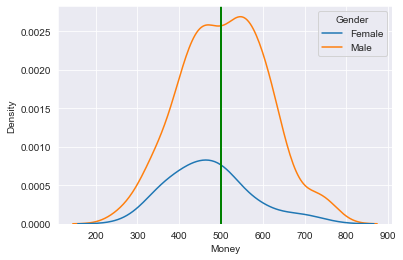

In [10]:
sns.kdeplot(x = rlanders["Money"], hue=rlanders["Gender"])
plt.axvline(500, color="orange", lw=2)
plt.axvline(sm, color="green", lw=2)

$\alpha = 0.05$

In [11]:
rlander_men = rlanders.where(rlanders["Gender"] == "Male")
sm_men = np.mean(rlanders["Money"].where(rlanders["Gender"] == "Male"))
sm_men

507.5353535353535

In [12]:
rlander_men.dropna(inplace=True)
rlander_men.count()

ID        198
Gender    198
Money     198
Days      198
Months    198
Count     198
Survey    198
dtype: int64

In [13]:
a = 0.05
p = stats.norm.sf(sm_men, loc=500, scale=98/np.sqrt(198))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.13964
p > a: do not reject H0


In [14]:
rlander_women = rlanders.where(rlanders["Gender"] == "Female")
sm_women = np.mean(rlanders["Money"].where(rlanders["Gender"] == "Female"))
sm_women

472.0576923076923

In [15]:
rlander_women.dropna(inplace=True)
rlander_women.count()

ID        52
Gender    52
Money     52
Days      52
Months    52
Count     52
Survey    52
dtype: int64

In [16]:
a = 0.05
p = stats.norm.cdf(sm_women, loc=500, scale=98/np.sqrt(52))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.01989
p < a: reject H0


In [17]:
rlanders.size

1750

In [18]:
g1 = 500 - stats.norm.isf(a/2) * 98 / np.sqrt(250)
g2 = 500 + stats.norm.isf(a/2) * 98 / np.sqrt(250)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)

Acceptance region [g1, g2] ≃ [487.852, 512.148]
Sample mean = 500.156 is inside acceptance region: do not reject H0


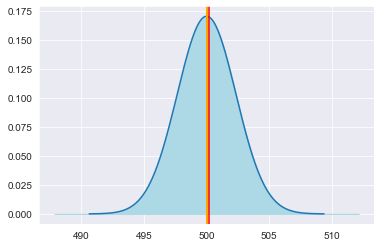

In [19]:
# Gauss-curve
# X-values
dist_x = np.linspace(500 - 4 * 98/np.sqrt(1750), 500 + 4 * 98/np.sqrt(1750), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=500, scale=98/np.sqrt(1750))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(500, color="orange", lw=2)
# Sample mean in red
dplot.axvline(sm, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=500, scale=98/np.sqrt(1750))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue')